Nome: Luiz Augusto Bello Marques dos Anjos  
Matrícula: 202010242

# <center>**Relatório do Proj1a**</center>

#### <center>Data para entrega: 11/03/2024</center>

---

##### Sumário

1. Introdução
2. Código Fonte
   1. Versão em C
   2. Versão em Java
5. Resultados

---

### 1) Introdução

A ordenação de elementos é essencial em muitos domínios da computação, e os algoritmos de ordenação por inserção são reconhecidos por sua simplicidade e eficácia, especialmente em conjuntos de dados menores. Neste trabalho explorei a eficiência dos algoritmos de ordenação por inserção implementados em linguagens de programação C e Java.   
Neste relatório, compartilho os códigos fonte das implementações em ambas as linguagens, descrevo o processo de compilação e execução de cada versão e apresento uma análise dos resultados obtidos durante a execução dos algoritmos em conjuntos de dados aleatórios.

### 2) Código Fonte

#### a) Versão em C


In [ ]:
#include <stdio.h>
#include <stdlib.h>
#include <time.h>

// Função para criar vetores aleatórios
void criaVetores(int vetores[][100], int num_Vetores, int tam_vetores) {
    int i, j;
    srand(time(NULL));
    for (i = 0; i < num_Vetores; i++) {
        for (j = 0; j < tam_vetores; j++) {
            vetores[i][j] = rand() % 1000; // números inteiros aleatórios entre 0 e 999
        }
    }
}

// Função para ordenar vetor usando o algoritmo de ordenação por inserção
void insertionSort(int arr[], int n) {
    int i, key, j;
    for (i = 1; i < n; i++) {
        key = arr[i];
        j = i - 1;

        while (j >= 0 && arr[j] > key) {
            arr[j + 1] = arr[j];
            j = j - 1;
        }
        arr[j + 1] = key;
    }
}

// Função para embaralhar vetor
void embaralha_Vetor(int arr[], int n) {
    srand(time(NULL));
    if (n > 1) {
        int i;
        for (i = n - 1; i > 0; i--) {
            int j = rand() % (i + 1);
            int temp = arr[i];
            arr[i] = arr[j];
            arr[j] = temp;
        }
    }
}

int main() {
    int vetores[1024][100];
    int i, j, n = 100;
    int x = 1024; // Número de ciclos

    // Gerar vetores aleatórios
    criaVetores(vetores, 1024, n);

    // Abrir arquivo para escrita
    FILE *fp = fopen("tempos_c.txt", "w");
    if (fp == NULL) {
        printf("Erro ao abrir arquivo para escrita.\n");
        return 1;
    }

    while (x > 0) {
        // Medir o tempo de execução
        clock_t begin = clock();

        // Ordenar 1024 vetores e registrar o tempo de execução
        for (i = 0; i < 1024; i++) {
            insertionSort(vetores[i], n);
        }

        clock_t end = clock();
        double time_spent = (double)(end - begin) / CLOCKS_PER_SEC;

        // Escrever o tempo de processamento no arquivo
        fprintf(fp, "%.9f\n", time_spent);

        x--; // Decrementa o número de ciclos

        // Re-embaralha os vetores para proximo ciclo
        for (i = 0; i < 1024; i++) {
            embaralha_Vetor(vetores[i], n);
        }
    }

    // Fechar arquivo
    fclose(fp);
    return 0;
}

#### Linhas de comando para compilação:

In [ ]:
gcc -o Ordenacao_c Ordenacao_c.c
./Ordenacao_c

#### b) Versão em Java:

In [ ]:
import java.io.FileWriter;
import java.io.IOException;
import java.util.Random;

public class Ordenacao_java {
    private int[][] vetores;
    private int numVetores;
    private int tamVetores;
    private String arquivoSaida;

    // Construtor da classe Ordenacao_java
    public Ordenacao_java(int numVetores, int tamVetores, String arquivoSaida) {
        this.numVetores = numVetores;
        this.tamVetores = tamVetores;
        this.arquivoSaida = arquivoSaida;
        this.vetores = new int[numVetores][tamVetores];
    }

    // Função para criar vetores aleatórios
    public void criaVetores() {
        Random rand = new Random();
        for (int i = 0; i < numVetores; i++) {
            for (int j = 0; j < tamVetores; j++) {
                vetores[i][j] = rand.nextInt(1000); // números inteiros aleatórios entre 0 e 999
            }
        }
    }

    // Função para ordenar vetor usando o algoritmo de ordenação por inserção
    public void insertionSort(int[] arr) {
        int n = arr.length;
        for (int i = 1; i < n; i++) {
            int key = arr[i];
            int j = i - 1;

            while (j >= 0 && arr[j] > key) {
                arr[j + 1] = arr[j];
                j = j - 1;
            }
            arr[j + 1] = key;
        }
    }

    // Função para embaralhar vetor
    public void embaralhaVetor(int[] arr) {
        Random rand = new Random();
        int n = arr.length;
        if (n > 1) {
            for (int i = n - 1; i > 0; i--) {
                int j = rand.nextInt(i + 1);
                int temp = arr[i];
                arr[i] = arr[j];
                arr[j] = temp;
            }
        }
    }

    // Função principal
    public void executar() {
        criaVetores();

        try (FileWriter fw = new FileWriter(arquivoSaida)) {
            int x = numVetores; // Número de ciclos

            while (x > 0) {
                // Medir o tempo de execução
                long startTime = System.nanoTime();

                // Ordenar 1024 vetores e registrar o tempo de execução
                for (int i = 0; i < numVetores; i++) {
                    insertionSort(vetores[i]);
                }

                long endTime = System.nanoTime();
                double timeSpent = (endTime - startTime) / 1e9; // Convertendo para segundos

                // Escrever o tempo de processamento no arquivo
                fw.write(String.format("%.9f\n", timeSpent));

                x--; // Decrementa o número de ciclos

                // Re-embaralha os vetores para próximo ciclo
                for (int i = 0; i < numVetores; i++) {
                    embaralhaVetor(vetores[i]);
                }
            }
        } catch (IOException e) {
            System.out.println("Erro ao escrever no arquivo.");
            e.printStackTrace();
        }
    }

    public static void main(String[] args) {
        int numVetores = 1024;
        int tamVetores = 100;
        String arquivoSaida = "tempos_java.txt";

        Ordenacao_java Ordenacao_java = new Ordenacao_java(numVetores, tamVetores, arquivoSaida);
        Ordenacao_java.executar();
    }
}

#### Linhas de comando para compilação:

In [ ]:
javac .\Ordenacao_java.java
java Ordenacao_java

### 3) Resultados

**Código para leitura dos dados resultantes (em python):**

In [6]:
def ler_tempos(arquivo):
    with open(arquivo, 'r') as f:
        tempos = [float(line.replace(',', '.')) for line in f]
    return tempos

# Lê os tempos dos arquivos
tempos1_c = ler_tempos('tempos1_c.txt')
tempos1_java = ler_tempos('tempos1_java.txt')
tempos2_c = ler_tempos('tempos2_c.txt')
tempos2_java = ler_tempos('tempos2_java.txt')
tempos3_c = ler_tempos('tempos3_c.txt')
tempos3_java = ler_tempos('tempos3_java.txt')

**Exemplo de formato dos dados gerados em uma execução de cada c:**

In [7]:
import pandas as pd

# Criando um DataFrame do pandas com os dados
dados_tempo = pd.DataFrame({'Tempos C': tempos1_c, 'Tempos Java': tempos1_java})

dados_tempo.info()

# Exibindo os dados em uma tabela
print("Dados em tabela:")
print(dados_tempo)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Tempos C     1024 non-null   float64
 1   Tempos Java  1024 non-null   float64
dtypes: float64(2)
memory usage: 16.1 KB
Dados em tabela:
      Tempos C  Tempos Java
0        0.006     0.012054
1        0.007     0.001636
2        0.007     0.001830
3        0.008     0.001594
4        0.008     0.002390
...        ...          ...
1019     0.006     0.001767
1020     0.007     0.001757
1021     0.006     0.001718
1022     0.006     0.001732
1023     0.006     0.001716

[1024 rows x 2 columns]


**Gráficos comparando o tempo de 3 execuções dos códigos em C e Java:**

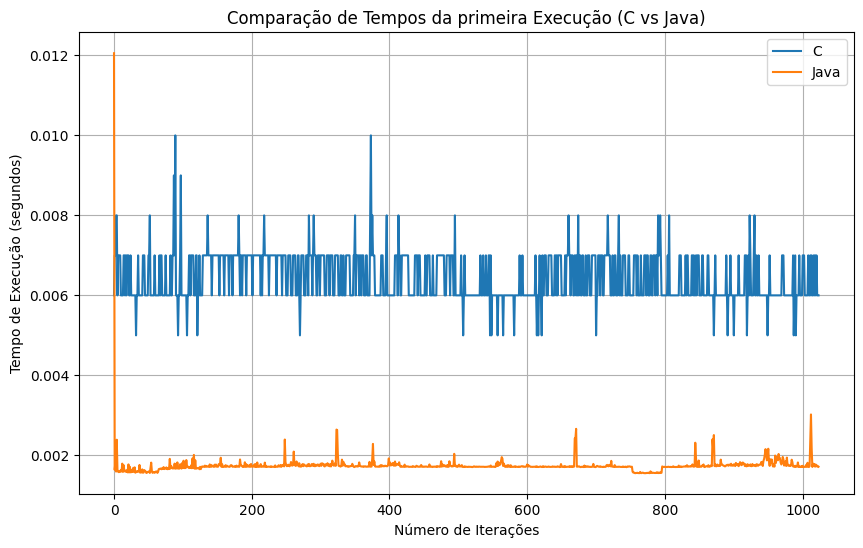

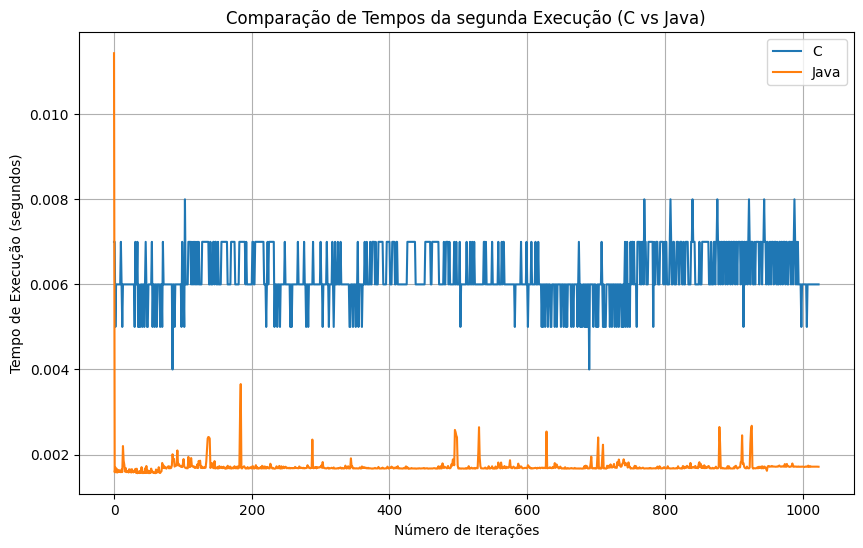

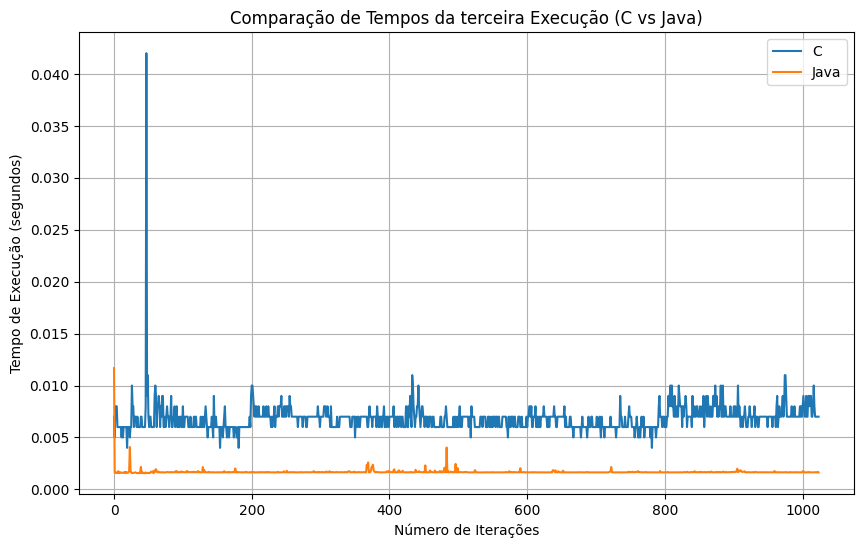

In [8]:
import matplotlib.pyplot as plt

# Plota o gráfico
plt.figure(figsize=(10, 6))
plt.plot(tempos1_c, label='C')
plt.plot(tempos1_java, label='Java')
plt.title('Comparação de Tempos da primeira Execução (C vs Java)')
plt.xlabel('Número de Iterações')
plt.ylabel('Tempo de Execução (segundos)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(tempos2_c, label='C')
plt.plot(tempos2_java, label='Java')
plt.title('Comparação de Tempos da segunda Execução (C vs Java)')
plt.xlabel('Número de Iterações')
plt.ylabel('Tempo de Execução (segundos)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(tempos3_c, label='C')
plt.plot(tempos3_java, label='Java')
plt.title('Comparação de Tempos da terceira Execução (C vs Java)')
plt.xlabel('Número de Iterações')
plt.ylabel('Tempo de Execução (segundos)')
plt.legend()
plt.grid(True)
plt.show()

**Detalhes sobre cada execução:**

In [9]:
import numpy as np

def detalhes(tempos_c, tempos_java, title):
    # Calcula detalhes
    min_c = min(tempos_c)
    min_java = min(tempos_java)
    max_c = max(tempos_c)
    max_java = max(tempos_java)
    mean_c = np.mean(tempos_c)
    mean_java = np.mean(tempos_java)
    median_c = np.median(tempos_c)
    median_java = np.median(tempos_java)
    std_c = np.std(tempos_c)
    std_java = np.std(tempos_java)
    
    # Exibe detalhes
    print("Detalhes para", title + ":")
    print("Mínimo - C:", min_c, "| Java:", min_java)
    print("Máximo - C:", max_c, "| Java:", max_java)
    print("Média - C:", mean_c, "| Java:", mean_java)
    print("Mediana - C:", median_c, "| Java:", median_java)
    print("Desvio Padrão - C:", std_c, "| Java:", std_java)
    print("\n")

# Usando a função para exibir detalhes para a primeira execução
detalhes(tempos1_c, tempos1_java, "execução 1")

# Usando a função para exibir detalhes para a segunda execução
detalhes(tempos2_c, tempos2_java, "execução 2")

# Usando a função para exibir detalhes para a terceira execução
detalhes(tempos3_c, tempos3_java, "execução 3")


Detalhes para execução 1:
Mínimo - C: 0.005 | Java: 0.0015528
Máximo - C: 0.01 | Java: 0.0120545
Média - C: 0.006442382812500003 | Java: 0.0017465626953125
Mediana - C: 0.006 | Java: 0.0017192
Desvio Padrão - C: 0.0006080519177706701 | Java: 0.00034260842953898955


Detalhes para execução 2:
Mínimo - C: 0.004 | Java: 0.0015608
Máximo - C: 0.008 | Java: 0.0114345
Média - C: 0.006250000000000002 | Java: 0.0017213625976562502
Mediana - C: 0.006 | Java: 0.0016824499999999998
Desvio Padrão - C: 0.0006139650845121406 | Java: 0.00033327175941346885


Detalhes para execução 3:
Mínimo - C: 0.004 | Java: 0.0015558
Máximo - C: 0.042 | Java: 0.0116751
Média - C: 0.006841796875000002 | Java: 0.0016768406249999999
Mediana - C: 0.007 | Java: 0.001643
Desvio Padrão - C: 0.0014551803655355696 | Java: 0.0003398372988324477


